# Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio


  Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos.
    
  Nesse projeto temos uma base de dados de uma instituição financeira onde nossa variável de interessa é a renda dos clientes da mesma.Essa instituição quer conhecer melhor o perfil de renda de seus novos clientes a fim de decobrir novos insights que podem ser utilizados para aprimorar a experiência desses clientes. 

- **Objetivos do negócio**: conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.
   

- **Objetivos da modelagem**: construir um modelo preditivo de renda para essa instituição financeira com base em algumas variáveis que essa já possui em seu banco de dados.

## Etapa 2 Crisp-DM: Entendimento dos dados
</span>


### Dicionário de dados

<span>Resumo das variáveis do conjunto de dados</span>


| Variável                | Descrição                                             | Tipo         |
| ----------------------- |:---------------------------------------------------:  | ------------:|
| data_ref                |  Data de referência de coleta das variáveis           | object       |
| id_cliente              |  Código de identificação do cliente                   | int64        |
| sexo                    |  Sexo do cliente                                      | object       |
| posse_de_veiculo        |  Indica se o cliente possui ve                        | bool         |
| posse_de_imovel         |  Indica se o cliente po                               | bool         |
| qtd_filhos              |  Quantidade de filhos do                              | int64        |
| tipo_renda              |  Tipo de renda do client                              | object       |
| educacao                |  Grau de instrução do cliente                         | object       |
| estado_civil            |  Estado civil do cliente                              | object       |
| tipo_residencia         |  Tipo de residência do cliente (alugada/propria, etc) | object       |
| idade                   |  Idade do cliente                                     | int64        |
| tempo_emprego           |  Tempo no emprego atual                               | float64      |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência        | float64      |
| renda                   |  Renda em reais                                       | float64      |





#### Carregando os pacotes

In [1026]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [1027]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [1028]:
#prof = ProfileReport(renda, explorative=True, minimal=True)

In [1029]:
#prof.to_file('./output/renda_analisys.html')

In [1030]:
renda.shape

(15000, 15)

In [1031]:
renda.head(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [1032]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [1033]:
renda.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

- Pode-se observar que há valores faltantes na variável tempo_emprego, equivalente a 17.2% dos dados dessa variável

In [1034]:
renda.describe()

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,7499.500000,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4330.271354,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,0.000000,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,3749.750000,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,7499.500000,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,11249.250000,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,14999.000000,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [1036]:
renda['renda'].describe()

count     15000.000000
mean       5697.287057
std        8266.816289
min         118.710000
25%        2026.110000
50%        3499.720000
75%        6392.167500
max      245141.670000
Name: renda, dtype: float64

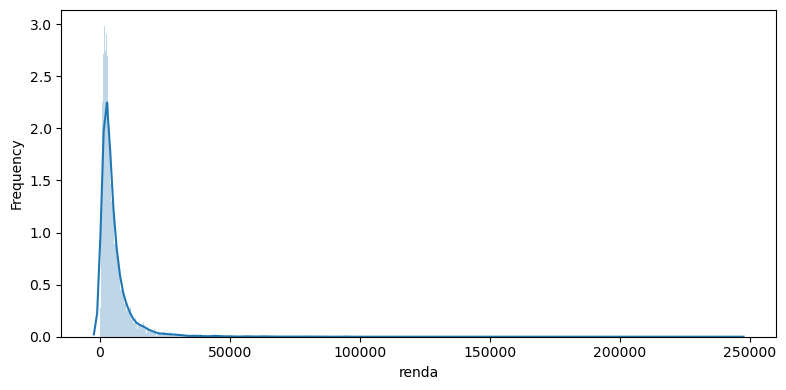

In [1047]:
plt.figure(figsize=(8,4))
sns.histplot(
    renda["renda"], kde=True,
    stat="frequency", kde_kws=dict(cut=2),
    alpha=.3, edgecolor=(1, 1, 1, .4),
)
plt.show()

In [1038]:
#Calculando a assimetria e curtose da variável
print("Assimetria: %f" % renda['renda'].skew())
print("Kurtosis: %f" % renda['renda'].kurt())

Assimetria: 8.385628
Kurtosis: 131.881199


- Vemos aqui que nossa variável renda possui uma assimetria à direita, ou seja, possui o valor da média>mediana.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


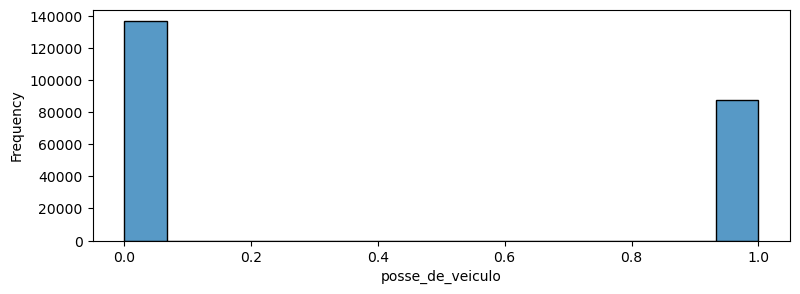

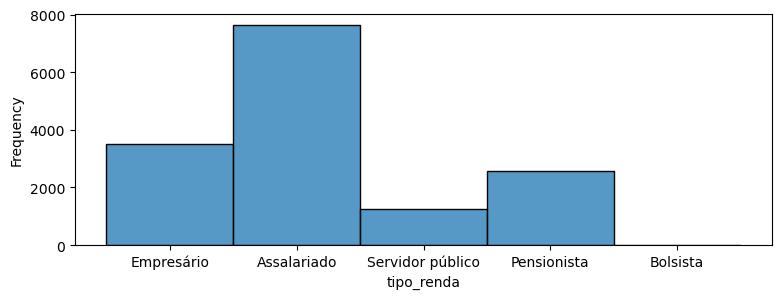

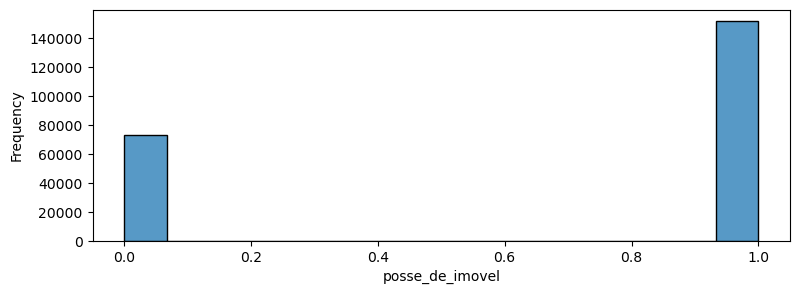

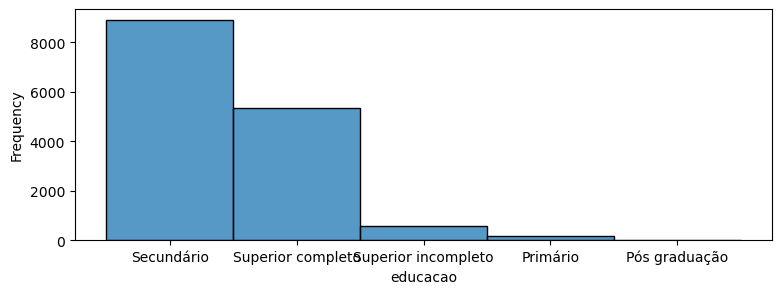

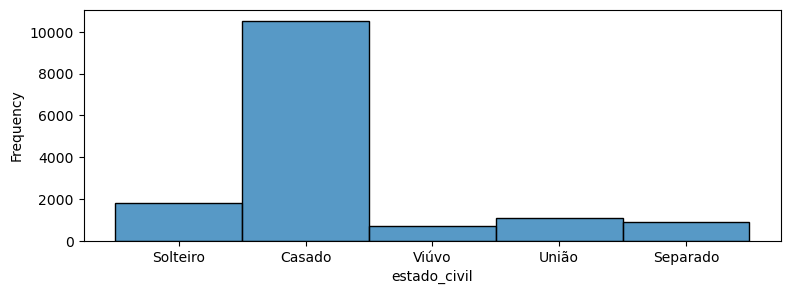

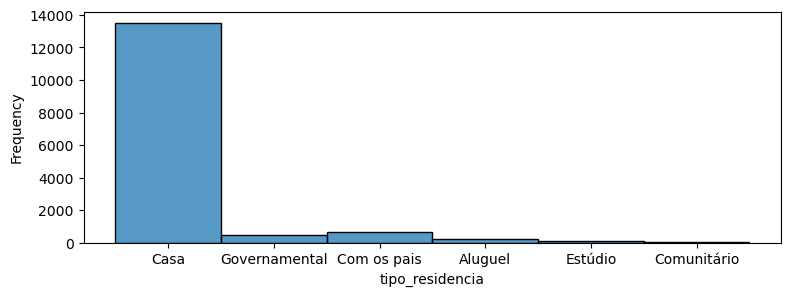

In [964]:
for i in ['posse_de_veiculo', 'tipo_renda', 'posse_de_imovel', 'educacao', 'estado_civil','tipo_residencia']:
    plt.figure(figsize=(9,3))
    sns.histplot(
    renda[i],
    stat="frequency")
    plt.show

### Entendimento dos dados - Bivariadas




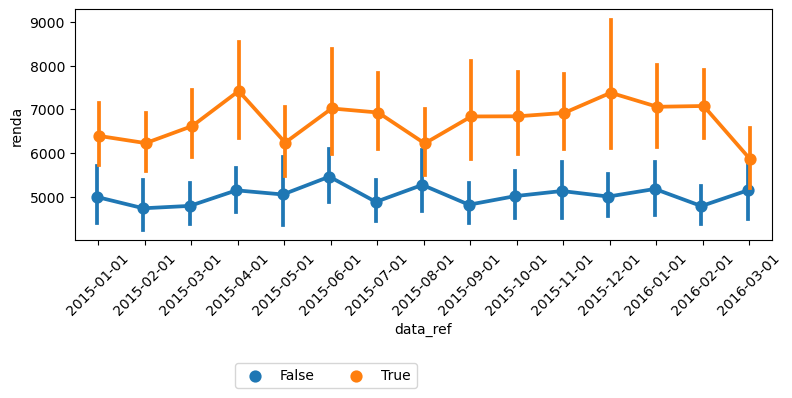

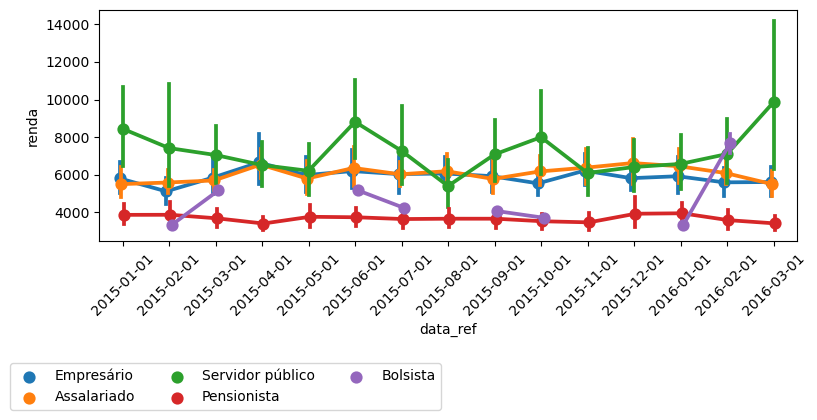

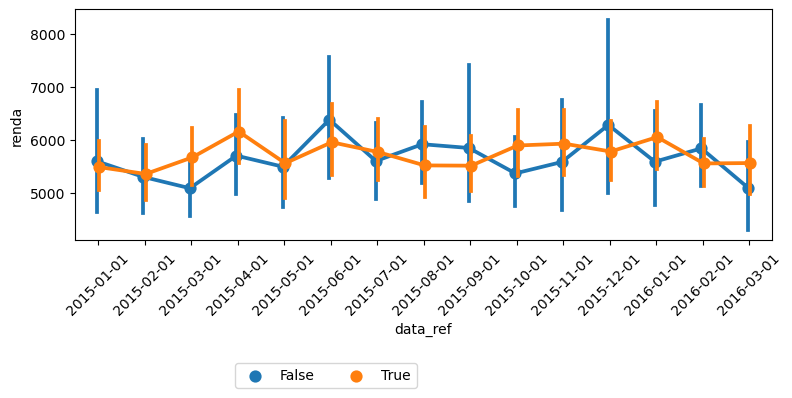

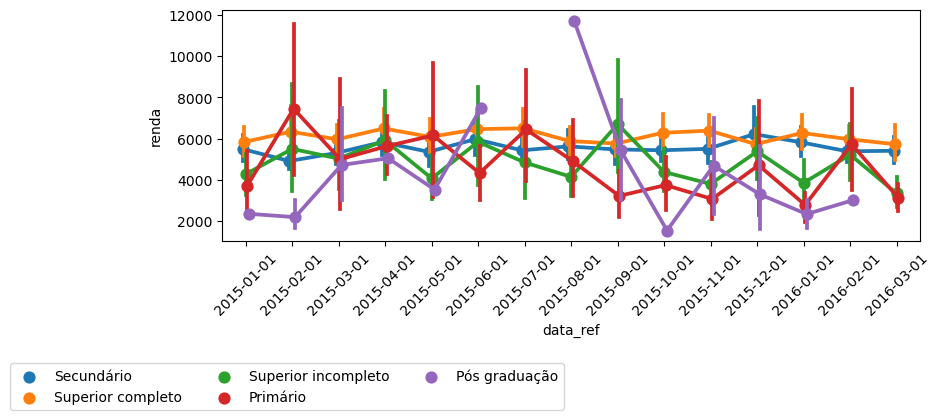

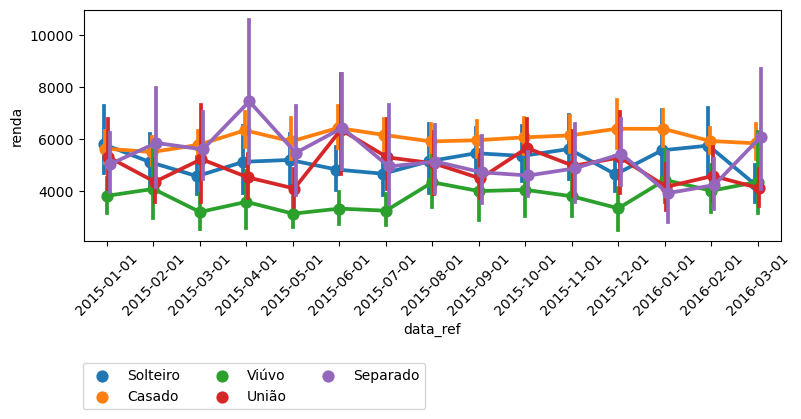

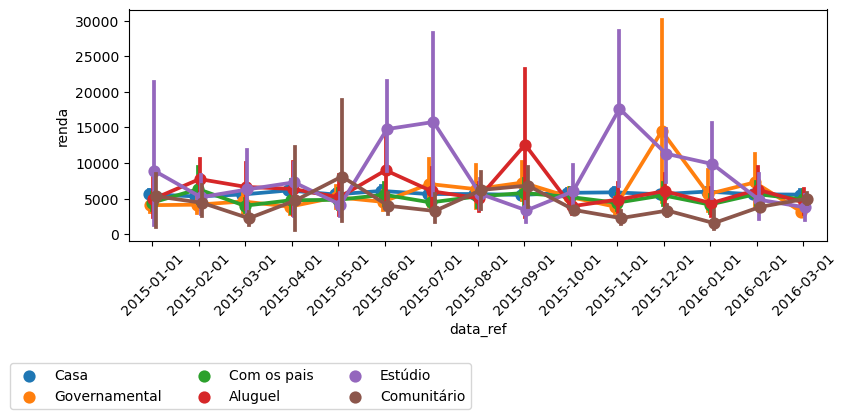

In [965]:
for i in ['posse_de_veiculo', 'tipo_renda', 'posse_de_imovel', 'educacao', 'estado_civil','tipo_residencia']:
    plt.figure(figsize=(9,3))
    ax = sns.pointplot(x='data_ref', y='renda' , hue = i,
                   data=renda, dodge=True, errorbar=('ci', 95))
    plt.legend(loc = 'best', bbox_to_anchor=(0.5, -.50),ncol = 3)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
    plt.show

- Vemos que a variável posse_de_veículo parece ser uma boa explicativa de renda, já que quem possui veículo parece ter uma tendência a ter maior renda

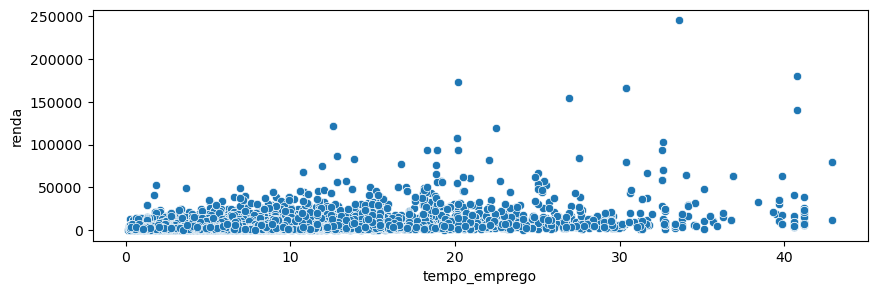

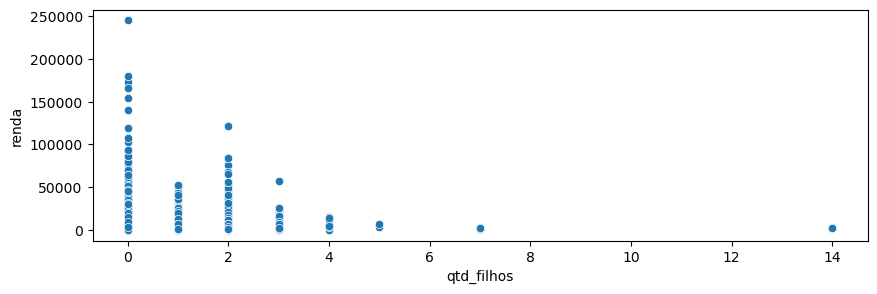

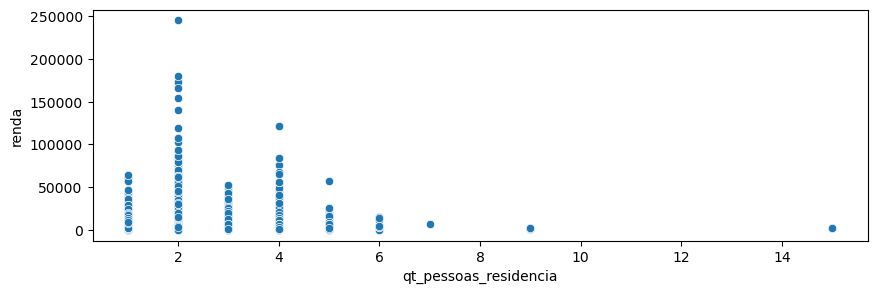

In [966]:
for i in ['tempo_emprego', 'qtd_filhos', 'qt_pessoas_residencia']:
    plt.figure(figsize=(10,3))
    sns.scatterplot(data=renda,y='renda',x=i)
    plt.show

In [967]:
#drop nas variáveis e transformando qualitativas em dummies
renda = renda.drop(columns = ['Unnamed: 0','id_cliente','data_ref'])
renda_dum  = pd.get_dummies(renda, drop_first=True)

#Substituindo valores nulos pela mediana
renda_dum.fillna(renda_dum.median(), inplace=True)
print(renda_dum.info())
renda_dum.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               15000 non-null  bool   
 1   posse_de_imovel                15000 non-null  bool   
 2   qtd_filhos                     15000 non-null  int64  
 3   idade                          15000 non-null  int64  
 4   tempo_emprego                  15000 non-null  float64
 5   qt_pessoas_residencia          15000 non-null  float64
 6   renda                          15000 non-null  float64
 7   sexo_M                         15000 non-null  bool   
 8   tipo_renda_Bolsista            15000 non-null  bool   
 9   tipo_renda_Empresário          15000 non-null  bool   
 10  tipo_renda_Pensionista         15000 non-null  bool   
 11  tipo_renda_Servidor público    15000 non-null  bool   
 12  educacao_Pós graduação         15000 non-null 

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,8060.34,False,False,True,...,False,False,True,False,False,True,False,False,False,False
1,True,True,0,28,7.183562,2.0,1852.15,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,True,True,0,35,0.838356,2.0,2253.89,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,False,True,1,30,4.846575,3.0,6600.77,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,0,33,4.293151,1.0,6475.97,True,False,False,...,False,False,True,False,False,False,False,False,False,True


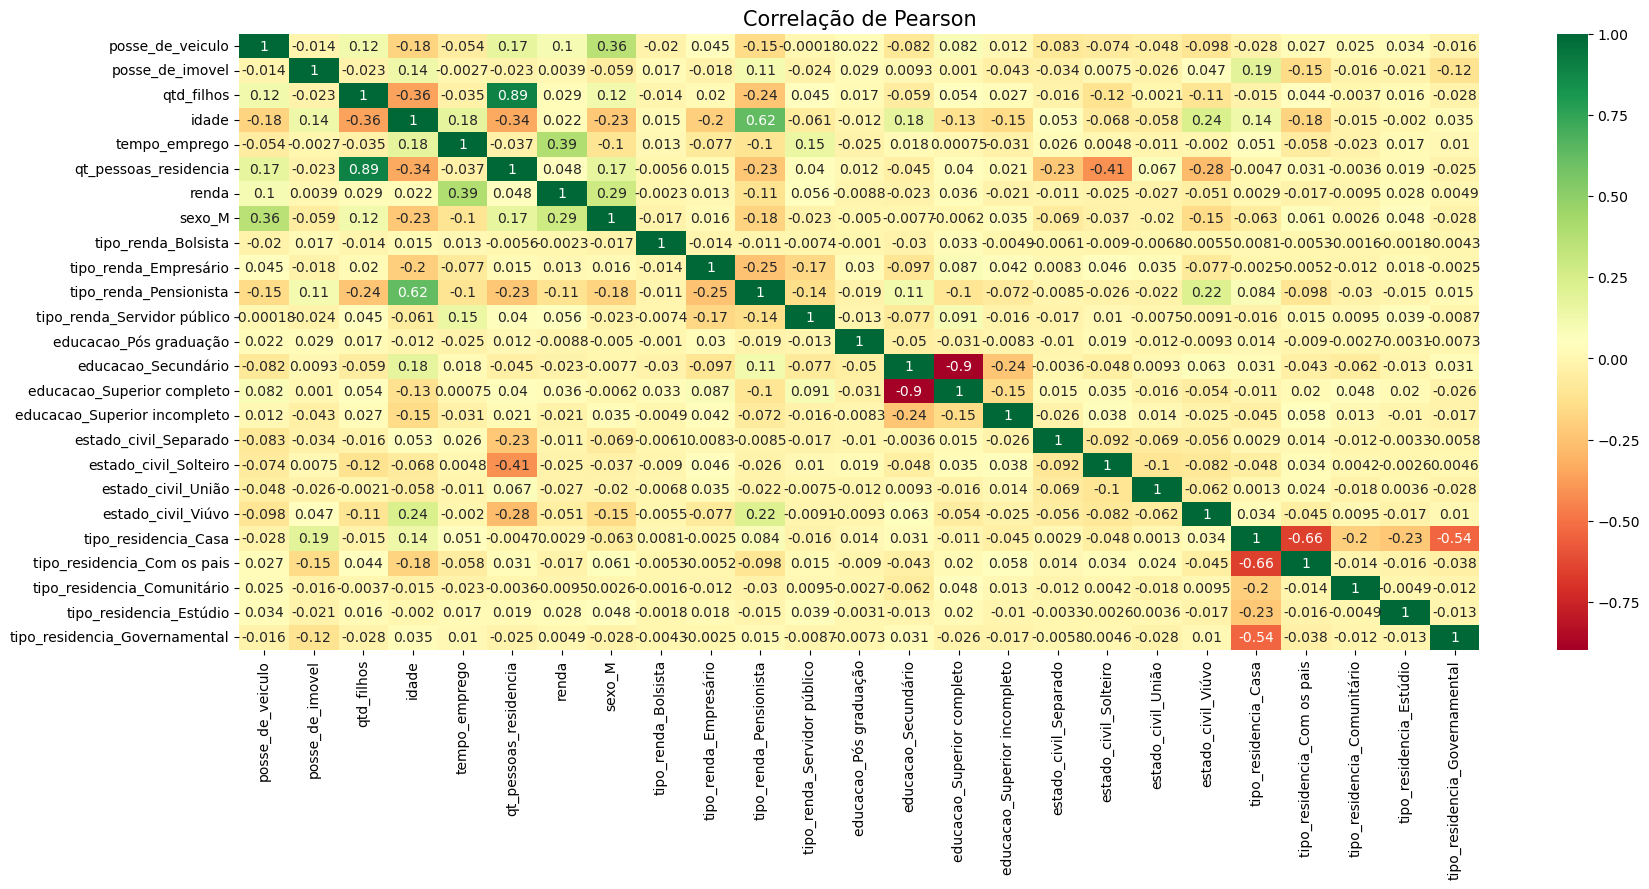

In [968]:
plt.figure(figsize=(20,8))
sns.heatmap(renda_dum.corr(), annot = True, cmap= "RdYlGn");
plt.title('Correlação de Pearson',size=15);

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\Eric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


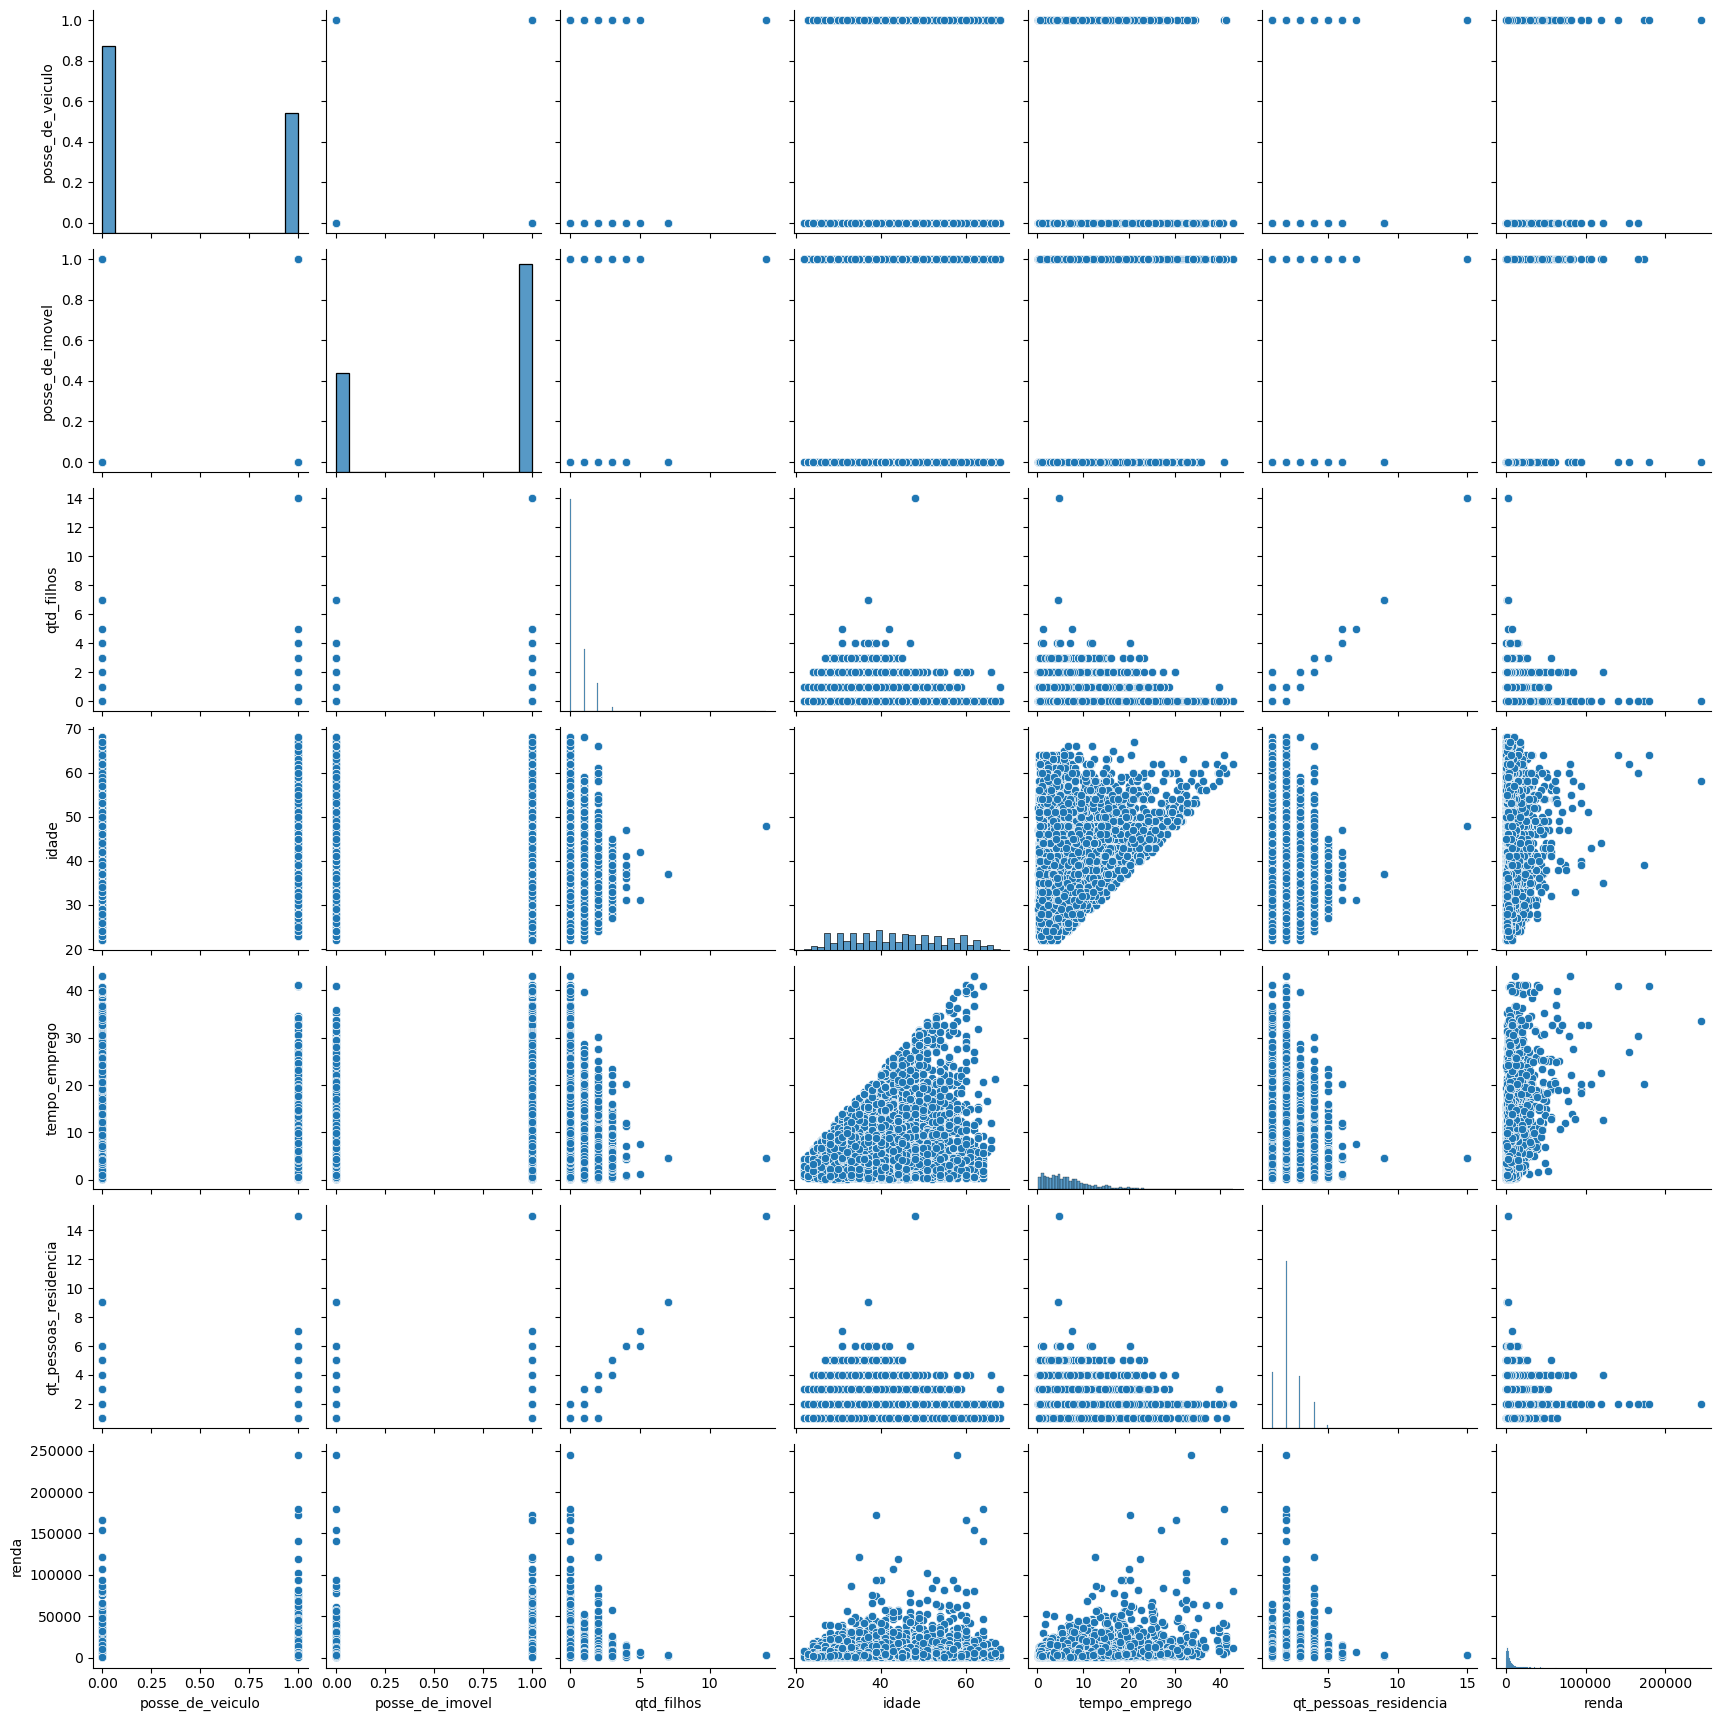

In [969]:
sns.pairplot(data=renda)

Aqui podemos observar que a variável tempo_de_emprego é a que possui maior correlação com a variável renda. Além disso, há variáveis como qtd_filhos e qtd_pessoas_residencia tem uma das maiores correlações também. Porém, as variáveis qtd_pessoas_residencia e qtd_filhos apresentam alta correlação entre si, assim como educacao_Secundário e educacao_Superior completo. Desse modo, vale analisar a retirada de uma delas do conjunto para o modelo.
- qtd_pessoas_residencia vs qtd_filhos
- educacao_secundario vs educacao_Superior completo

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [970]:
renda_dum[['renda', 'qt_pessoas_residencia', 'qtd_filhos', 'educacao_Secundário', 'educacao_Superior completo']].corr()

,renda,qt_pessoas_residencia,qtd_filhos,educacao_Secundário,educacao_Superior completo
renda,1.000000,0.047842,0.029346,-0.023185,0.036099
qt_pessoas_residencia,0.047842,1.000000,0.889777,-0.044589,0.039931
qtd_filhos,0.029346,0.889777,1.000000,-0.059181,0.054186
educacao_Secundário,-0.023185,-0.044589,-0.059181,1.000000,-0.896802
educacao_Superior completo,0.036099,0.039931,0.054186,-0.896802,1.000000


- Vamos retirar as variáveis qtd_filhos e educacao_Secundário, já que são variáveis que tem correlação com outras fora a renda.

In [971]:
renda_dum.drop(columns = ['qtd_filhos','educacao_Secundário'],inplace=True)
renda.drop(columns = ['qtd_filhos'],inplace=True)

In [972]:
renda_dum.columns

Index(['posse_de_veiculo', 'posse_de_imovel', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'sexo_M', 'tipo_renda_Bolsista',
       'tipo_renda_Empresário', 'tipo_renda_Pensionista',
       'tipo_renda_Servidor público', 'educacao_Pós graduação',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Casa',
       'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário',
       'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'],
      dtype='object')

<Axes: xlabel='renda', ylabel='Density'>

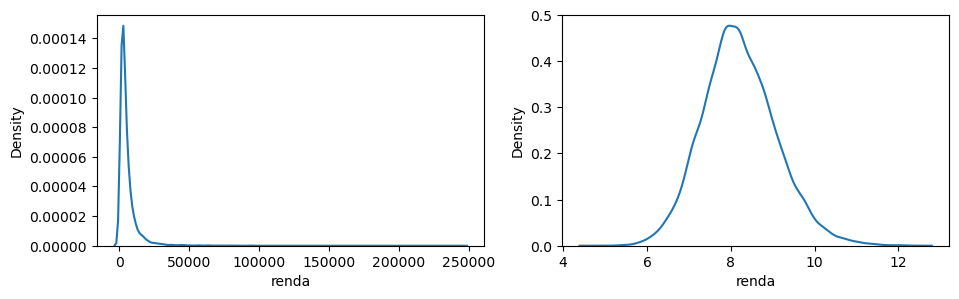

In [973]:
#transformação logarítimca na variável renda mostra como uma boa opção para reduzir a assimetria

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.kdeplot(x=renda['renda'])

plt.subplot(1,2,2)
sns.kdeplot(x=np.log(renda['renda']))

In [974]:
#Substituindo valores NaN pela mediana
renda.fillna(renda['tempo_emprego'].median(),inplace=True)
renda

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...
14995,F,False,True,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,F,False,True,Pensionista,Superior completo,Solteiro,Casa,57,6.013699,1.0,10093.45
14997,F,True,True,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [975]:
y =  renda.loc[:,'renda']
y

0         8060.34
1         1852.15
2         2253.89
3         6600.77
4         6475.97
           ...   
14995     7990.58
14996    10093.45
14997      604.82
14998     3352.27
14999     1160.99
Name: renda, Length: 15000, dtype: float64

In [976]:
X=renda_dum.drop(columns='renda')
X.columns

Index(['posse_de_veiculo', 'posse_de_imovel', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'sexo_M', 'tipo_renda_Bolsista',
       'tipo_renda_Empresário', 'tipo_renda_Pensionista',
       'tipo_renda_Servidor público', 'educacao_Pós graduação',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Casa',
       'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário',
       'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'],
      dtype='object')

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [977]:
df_train, df_test = train_test_split(renda, test_size=0.3, random_state=123)

### Modelo com Regularização Ridge

In [978]:
#Utilizando a regularização ridge
modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + idade + qt_pessoas_residencia + tempo_emprego'
md = smf.ols(modelo, data= df_train)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01
                         , alpha = 0.1)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     758.0
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        12:56:08   Log-Likelihood:                -11435.
No. Observations:               10500   AIC:                         2.289e+04
Df Residuals:                   10493   BIC:                         2.294e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.2973      0.042    174.907      0.000       7.215       7.379
sexo[T.M]                    0.7695      0.016     47.020      0.000       0.737       0.802
posse_de_veiculo[T.True]     0.0727      0.016      4.659      0.000       0.042       0.103
posse_de_imovel[T.True]      0.0949      0.015      6.237      0.000       0.065       0.125
idade                        0.0014      0.001      2.003      0.045    2.96e-05       0.003
qt_pessoas_residencia        0.0189      0.008      2.279      0.023       0.003       0.035
tempo_emprego                0.0631      0.001     54.303      0.000       0.061       0.065
==============================================================================
Omnibus:                        1.653   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.636
Skew:                           0.014   Prob(JB):                        0.441
Kurtosis:                       3.054   Cond. No.                         277.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelo utilizando Stepwise

In [979]:
X.replace({False: 0, True: 1}, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')
X

,posse_de_veiculo,posse_de_imovel,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,1,26,6.602740,1.0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,1,28,7.183562,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,35,0.838356,2.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,30,4.846575,3.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1,0,33,4.293151,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,1,48,13.887671,1.0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
14996,0,1,57,6.013699,1.0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
14997,1,1,45,7.832877,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14998,1,0,36,4.298630,2.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [980]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [981]:
def stepwise_selection(X_train, y_train, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X_train.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X_train, y_train)

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  sexo_M                         with p-value 9.64525e-306
#############
['tempo_emprego', 'sexo_M']
Add  educacao_Superior completo     with p-value 1.41743e-07
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo']
Add  tipo_renda_Empresário          with p-value 6.91423e-06
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'tipo_renda_Empresário']
Add  idade                          with p-value 3.26282e-05
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'tipo_renda_Empresário', 'idade']
Add  posse_de_imovel                with p-value 0.00310715
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'tipo_renda_Empresário', 'idade', 'posse_de_imovel']
Add  qt_pessoas_residencia          with p-value 0.00583281
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'tipo_renda_Empresário', 'idade', 'p

In [982]:
reg_stepwise = sm.OLS(np.log(y_train), sm.add_constant(pd.DataFrame(X_train[variaveis]))).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     621.1
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        12:56:18   Log-Likelihood:                -11341.
No. Observations:               10500   AIC:                         2.270e+04
Df Residuals:                   10490   BIC:                         2.278e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.0795      0.045    155.706      0.000       6.990       7.169
tempo_emprego                     0.0621      0.001     51.488      0.000       0.060       0.065
sexo_M                            0.7991      0.015     51.807      0.000       0.769       0.829
educacao_Superior completo        0.1412      0.015      9.614      0.000       0.112       0.170
tipo_renda_Empresário             0.1457      0.017      8.509      0.000       0.112       0.179
idade                             0.0050      0.001      5.748      0.000       0.003       0.007
posse_de_imovel                   0.0956      0.015      6.290      0.000       0.066       0.125
qt_pessoas_residencia             0.0245      0.008      2.978      0.003       0.008       0.041
tipo_residencia_Governamental     0.0645      0.041      1.579      0.114      -0.016       0.145
tipo_renda_Pensionista           -0.0900      0.025     -3.571      0.000      -0.139      -0.041
==============================================================================
Omnibus:                        1.242   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.222
Skew:                           0.003   Prob(JB):                        0.543
Kurtosis:                       3.052   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Árvore de Regressão

In [983]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

n_minimo,2,3,4,5,6,7
profundidade,,,,,,
2,0.267501,0.267501,0.267501,0.267501,0.267501,0.267501
3,0.396636,0.396636,0.396636,0.396636,0.396636,0.396636
4,0.460247,0.460247,0.461192,0.461192,0.417338,0.426474
5,0.446855,0.449673,0.454475,0.452331,0.408477,0.412413
6,0.422394,0.424271,0.444008,0.444768,0.400914,0.412829
7,0.433492,0.438565,0.457473,0.458405,0.415448,0.430916
8,0.424485,0.434883,0.450015,0.450647,0.409072,0.427117
9,0.407597,0.426183,0.453270,0.454184,0.419092,0.432008
10,0.414005,0.439664,0.452354,0.461393,0.433305,0.434088


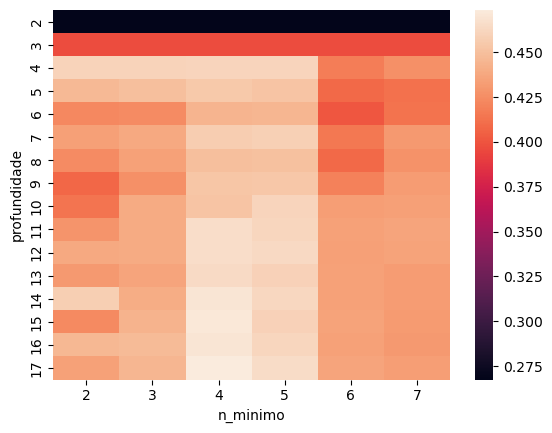

In [984]:
#Pré-poda
mses = []
ind_i = []
ind_j = []

for i in range(2, 18):
    for j in range(2, 8):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [986]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=4)

regr_1.fit(X_train, y_train)

mse1 = regr_1.score(X_test, y_test)
mse1

0.4710432814727217

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [987]:
# Avaliando o modelo
arvore_final = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5)
arvore_final.fit(X_train, y_train)

print(f"Profundiade : {arvore_final.get_depth()}")
print(f"R-quadrado na base testes : {arvore_final.score(X_test, y_test):2f}")
print(f"MSE na base testes : {mean_squared_error(y_test, arvore_final.predict(X_test)):2f}")

Profundiade : 15
R-quadrado na base testes : 0.461336
MSE na base testes : 37370335.485392


In [990]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')

absolute_errors = np.abs(y_test - y_pred)
mape = np.mean(absolute_errors / y_test) * 100

print(f"MAPE: {mape:.4f}")


RMSE: 6042.385621070669
MSE: 36510423.993721575
MAPE: 84.2167


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.